# Prueba Intertrimestral

Nombre y Apellidos: Elena Conderana Medem

Tiempo de la prueba: 1h y 45 mins

Asignatura: Desarrollo de Aplicaciones para la Visualización de Datos

Fecha: 14 de octubre de 2024

Instrucciones:

- Herramientas Sugeridas: Python (pandas, matplotlib, seaborn, scikit-learn).

- Evaluación: Se valorará la capacidad para interpretar los resultados y la claridad en la exposición de las conclusiones.

- Materiales permitidos: Materiales de clase. Internet para búsqueda de dudas y documentación.

- Prohibido: Mingún tipo de LLM, ni mensajería instantánea.

- Formato de Entrega: Los estudiantes deben presentar su trabajo en formato de notebook (por ejemplo, Jupyter Notebook), con gráficos y explicaciones detalladas.

- Entrega: Subir .ipynb y PDF a Github. Enviar resultados al siguiente enlace. Para crear PDF: File -> Print -> Destination as PDF

## [Entrega aquí el examen](https://forms.gle/gU7aKkzE7didZpYV7)




Carga aquí las librerías que creas que vayas a utilizar:

In [77]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

from sklearn.discriminant_analysis import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error


# Ejercicio 1: Programación (2 puntos)

a) Crea una función que calcule y devuelva el valor de la iteración $n+1$ del mapa logístico dada la fórmula:

$x_{n+1}=r⋅x_n⋅(1−x_n)$

donde:

- $r$ es la tasa de crecimiento
- $x_n$ es el valor de la iteración anterior.

La función debe aceptar como parámetros $r$ y $x_n$ (valor inicial). (0.6 puntos)


In [5]:
def mapa_log(r,x):
    x_sig = r*x*(1-x)
    return x_sig

mapa_log(2,5)

-40

b) Crea una función que genere una lista con las primeras n iteraciones del mapa logístico, utilizando la función anterior. (0.6 puntos)

In [22]:
def lista_mapa_log(iteraciones, r, x):
    lista = []
    while iteraciones > 0:
        lista.append(mapa_log(r,x))
        iteraciones = iteraciones-1
        x = mapa_log(r,x)
    return lista

lista_mapa_log(3,2,4)

[-24, -1200, -2882400]

c) Guarda en un dataframe las iteraciones del mapa logístico, para $r = \{0, 0.25, 0.5, 0.75, \dots, 4\}$ y semilla $x_0 = 0.2$. El dataframe debe tener tres columnas: $r$, $n$ y $x_{n+1}$. Muestra los 10 primeros resultados (0.6 puntos)

In [202]:
df_map = pd.DataFrame(columns=['r','n','x_n+1'])
df_map['r'] = [0.25]*10+[0.5]*10+[0.75]*10+[1]*10+[0.25]*10+[0.5]*10+[0.75]*10+[1]*10+[2.25]*10+[2.5]*10+[2.75]*10+[3]*10+[3.25]*10+[3.5]*10+[3.75]*10+[4]*10
df_map['n'] = [0,1,2,3,4,5,6,7,8,9]*16
df_map['x_n+1'] = pd.Series(lista_mapa_log(10,np.arange(0.25,4.25,0.25),0.2))


In [205]:
df_map.head()

,r,n,x_n+1
0,0.25,0,"[0.04000000000000001, 0.08000000000000002, 0.1..."
1,0.25,1,"[0.009600000000000001, 0.036800000000000006, 0..."
2,0.25,2,"[0.00237696, 0.017722880000000003, 0.054695520..."
3,0.25,3,"[0.0005928275152896, 0.008704389762252802, 0.0..."
4,0.25,4,"[0.0001481190177066789, 0.0043143116805597955,..."


d) ¿Cómo se podría programar en una clase las dos funciones anteriores para calcular y almacenar iteraciones del mapa logístico? Proporciona la implementación de la clase con un método para obtener el valor de una iteración específica, otro método para generar la lista completa de iteraciones y otro para crear un gráfico que visualice el $r$ y $x_{n+1}$. (0.2 puntos)

In [195]:
class mapa():
    def __init__(self,r,x):
        self.r = r
        self.x = x
    
    def mapa_log(self):
        x_sig = self.r*self.x*(1-self.x)
        return x_sig
        

    def lista_mapa_log(self, iteraciones):
        lista = []
        while iteraciones > 0:
            lista.append(mapa_log(self.r,self.x))
            iteraciones = iteraciones-1
            self.x = mapa_log(self.r,self.x)
        return lista
    
x = mapa(2,3)
x.mapa_log()
x.lista_mapa_log(3)

[-12, -312, -195312]

# Ejercicio 2: Exploración y comprensión (3 puntos)

a) Describe las principales variables del dataset proporcionado. ¿Qué información aportan y qué tipo de datos contiene cada una? ¿Existen valores faltantes en el dataset? Si es así, ¿en qué variables? ¿Qué propones para resolverlo? (1 puntos)


In [71]:
df_walmart = pd.read_csv('Walmart.csv')
print(df_walmart.shape)
print(df_walmart.isna().sum())
print(df_walmart.dtypes)
print(df_walmart.describe(include='all'))
df_walmart

(6435, 8)
Store           0
Date            0
Weekly_Sales    0
Holiday_Flag    0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    1
dtype: int64
Store             int64
Date             object
Weekly_Sales    float64
Holiday_Flag      int64
Temperature     float64
Fuel_Price      float64
CPI             float64
Unemployment    float64
dtype: object
              Store        Date  Weekly_Sales  Holiday_Flag  Temperature  \
count   6435.000000        6435  6.435000e+03   6435.000000  6435.000000   
unique          NaN         143           NaN           NaN          NaN   
top             NaN  05-02-2010           NaN           NaN          NaN   
freq            NaN          45           NaN           NaN          NaN   
mean      23.000000         NaN  1.046965e+06      0.069930    60.663782   
std       12.988182         NaN  5.643666e+05      0.255049    18.444933   
min        1.000000         NaN  2.099862e+05      0.000000    -2.060000   
25%       12.000000

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106
...,...,...,...,...,...,...,...,...
6430,45,28-09-2012,713173.95,0,64.88,3.997,192.013558,8.684
6431,45,05-10-2012,733455.07,0,64.89,3.985,192.170412,8.667
6432,45,12-10-2012,734464.36,0,54.47,4.000,192.327265,8.667
6433,45,19-10-2012,718125.53,0,56.47,3.969,192.330854,NaN


- Store: ID de la tienda de tipo int64. El resto de variables informan sobre datos de cada tienda, en total hay 45.
- Date: Fecha en la que se ha recopilado la información, de tipo object.
- Weekly_Sales: Cantidad de ventas por semana en la tienda, de tipo número flotante.
- Holiday_Flag: Si la venta se produjo en un día festivo o no, de tipo entero.
- Temperature: Temperatura en esa fecha, tipo número flotante.
- Fuel_Price: Precio de combustible en esa región, tipo número flotante.
- CPI: Measure of the average change over time in the prices paid by urban consumers for a market basket of consumer goods and services, tipo número flotante
- Unemployment: Tasa de desempleo, en número flotante.

Sólo existe un NaN en Unemployment, al tratarse de una única fila de 6435 simplemente podemos eliminarla, pues no va a afectar a la muestra.

b) Realiza un gráfico de barras que responda las siguientes preguntas. ¿Cuántas tiendas $Store$ están presentes en el dataset? ¿Cuál es la media de ventas semanales $Weekly Sales$ por tienda? ¿Qué tiendas tienen las ventas promedio más altas y más bajas? (1 puntos)



             Store  Weekly_Sales  Holiday_Flag  Temperature   Fuel_Price  \
count  6434.000000  6.434000e+03   6434.000000  6434.000000  6434.000000   
mean     22.996581  1.047016e+06      0.069941    60.664434     3.358512   
std      12.986295  5.643956e+05      0.255067    18.446292     0.458992   
min       1.000000  2.099862e+05      0.000000    -2.060000     2.472000   
25%      12.000000  5.531677e+05      0.000000    47.445000     2.933000   
50%      23.000000  9.608457e+05      0.000000    62.675000     3.445000   
75%      34.000000  1.420282e+06      0.000000    74.945000     3.735000   
max      45.000000  3.818686e+06      1.000000   100.140000     4.468000   

               CPI  Unemployment  
count  6434.000000   6434.000000  
mean    171.575168      7.999047  
std      39.358921      1.876012  
min     126.064000      3.879000  
25%     131.735000      6.891000  
50%     182.616521      7.874000  
75%     212.745096      8.622000  
max     227.232807     14.313000  


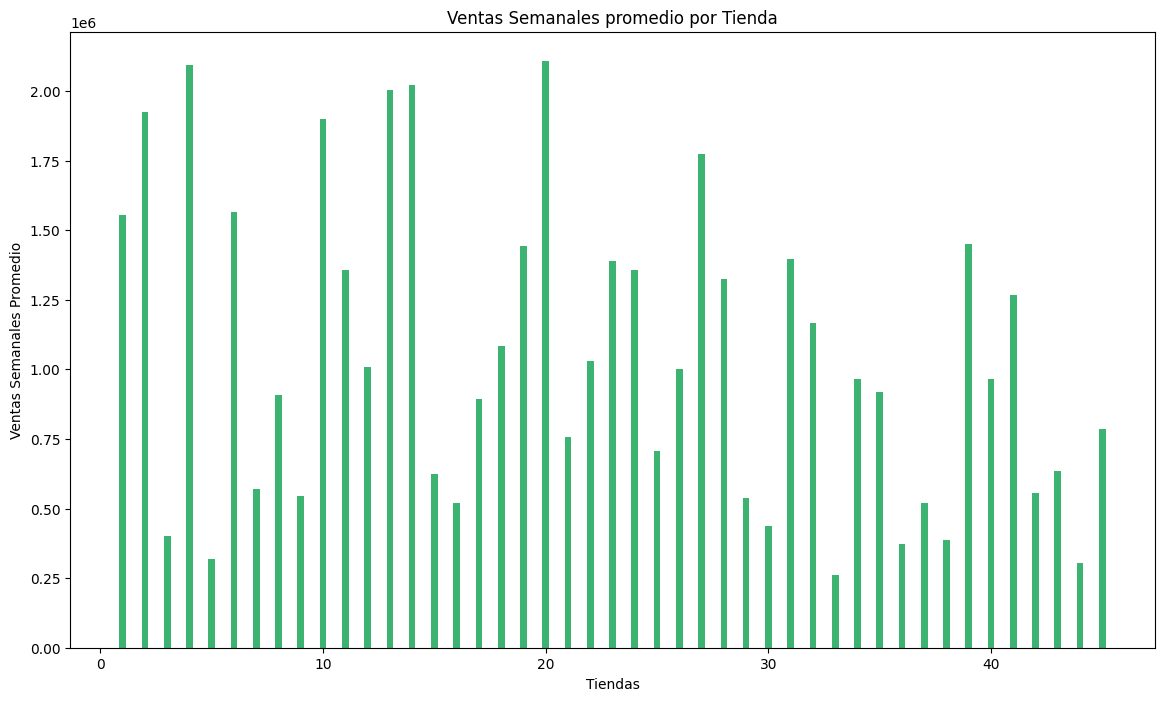

In [87]:
df_walmart = df_walmart.dropna()
print(df_walmart.describe())

plt.figure(figsize= (14,8))
sales = df_walmart.groupby('Store')['Weekly_Sales'].mean()
plt.bar(np.unique(df_walmart['Store']),sales,color = "mediumseagreen",width = 0.3, align = "center")

plt.xlabel("Tiendas")
plt.ylabel("Ventas Semanales Promedio")

plt.title("Ventas Semanales promedio por Tienda")

plt.show()

plt.show()

c) Genera un gráfico de líneas que muestre la evolución de las ventas semanales $Weekly Sales$ a lo largo del tiempo para la tienda con más ventas totales. ¿Observas algún patrón estacional o tendencia? (1 puntos)

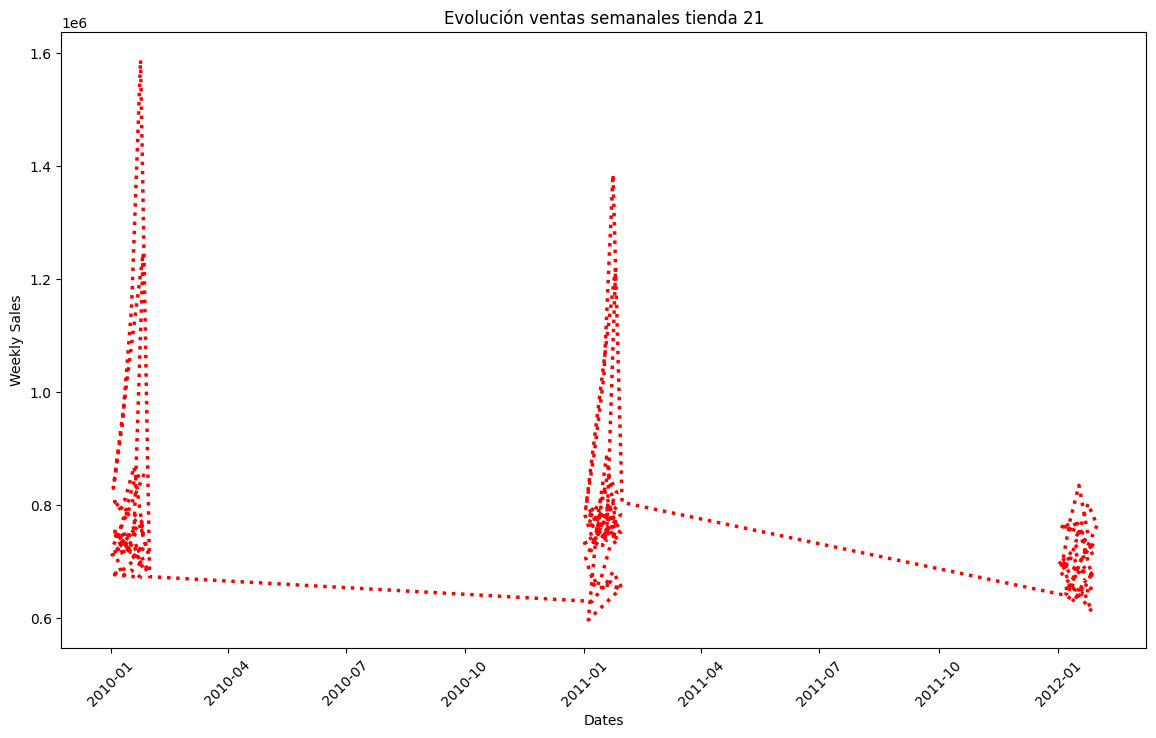

In [200]:
tienda_max = pd.Series(df_walmart.groupby('Store')['Weekly_Sales'].sum()).idxmax()+1
plt.figure(figsize= (14,8))
plt.plot(df_walmart[df_walmart['Store'] == tienda_max]['Date'], df_walmart[df_walmart['Store'] == tienda_max]['Weekly_Sales'], color = 'r', linewidth = 2.5, linestyle = ':')  
plt.xlabel('Dates')
plt.ylabel('Weekly Sales')
plt.xticks(rotation=45)
plt.title('Evolución ventas semanales tienda 21')
plt.show()

Sí parece que las ventas suben notablemente siempre en enero, probablemente motivadas por las Navidades y las festiviades donde se dan muchos regalos, por lo tanto sí existe una estacionalidad en los datos. 

# Ejrcicio 3: Análisis de Factores Externos (2 puntos)

a) Explora la relación entre el precio de combustible $Fuel Price$, la tasa de desempleo $Unemployment$ y las ventas semanales $Weekly Sales$. ¿Existe alguna correlación significativa? Genera dos gráficos de dispersión (scatter plot) para ilustrarlo. (1 puntos)

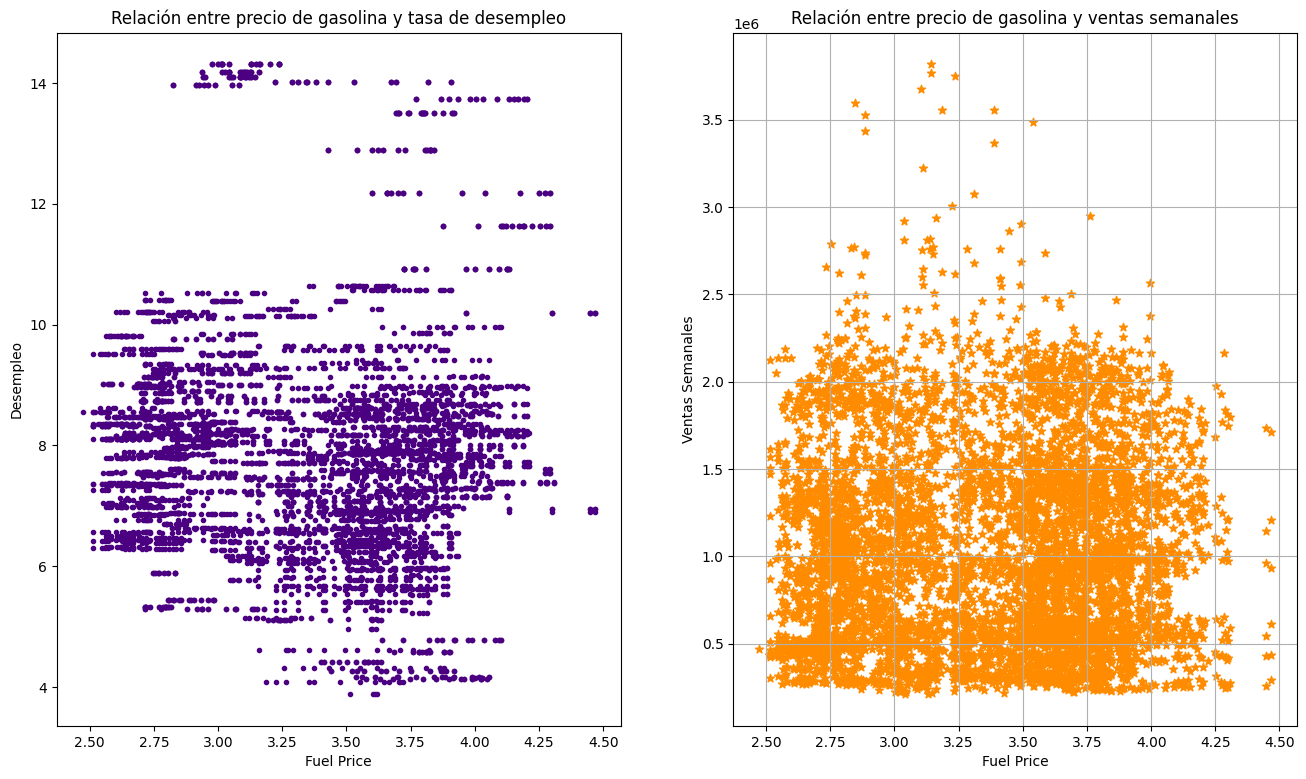

Correlation between Fuel Price and Weekly Sales: 0.009585801362649136
Correlation between Fuel Price and Unemployment: -0.03476245842895941


In [114]:
plt.figure(figsize = (16,9))
plt.subplot(1,2,1)

plt.scatter(df_walmart['Fuel_Price'],df_walmart['Unemployment'], c = "indigo", marker = '.')

plt.xlabel("Fuel Price")
plt.ylabel("Desempleo")

plt.title("Relación entre precio de gasolina y tasa de desempleo")

plt.subplot(1,2,2)


plt.scatter(df_walmart['Fuel_Price'],df_walmart['Weekly_Sales'], c = "darkorange", marker = '*')

plt.xlabel("Fuel Price")
plt.ylabel("Ventas Semanales")

plt.title("Relación entre precio de gasolina y ventas semanales")

plt.grid(True)
plt.show()

print('Correlation between Fuel Price and Weekly Sales: ' + str(df_walmart['Fuel_Price'].corr(df_walmart['Weekly_Sales'])))
print('Correlation between Fuel Price and Unemployment: ' + str(df_walmart['Fuel_Price'].corr(df_walmart['Unemployment'])))

No puedo decir que detecte ninguna correlación muy evidente. Este hecho se respalda con los gráficos y los valores de corr, que no indican ninguna tendencia concreta. 

c) Compara las ventas promedio de las semanas festivas $Holiday Flag = 1$ con las semanas no festivas $Holiday Flag = 0$. ¿Cuál es la diferencia promedio de ventas entre estos dos tipos de semanas? ¿Existe una diferencia estdísticamente significativa? (1 puntos)


In [130]:
holiday_sales = df_walmart[df_walmart['Holiday_Flag'] == 1]['Weekly_Sales']
no_holiday_sales = df_walmart[df_walmart['Holiday_Flag'] == 0]['Weekly_Sales']
print('Holiday:')
print(holiday_sales.describe())
print('No Holiday:')
print(no_holiday_sales.describe())

Holiday:
count    4.500000e+02
mean     1.122888e+06
std      6.276849e+05
min      2.153592e+05
25%      5.758655e+05
50%      1.018538e+06
75%      1.555213e+06
max      3.004702e+06
Name: Weekly_Sales, dtype: float64
No Holiday:
count    5.984000e+03
mean     1.041310e+06
std      5.589885e+05
min      2.099862e+05
25%      5.513391e+05
50%      9.562201e+05
75%      1.414399e+06
max      3.818686e+06
Name: Weekly_Sales, dtype: float64


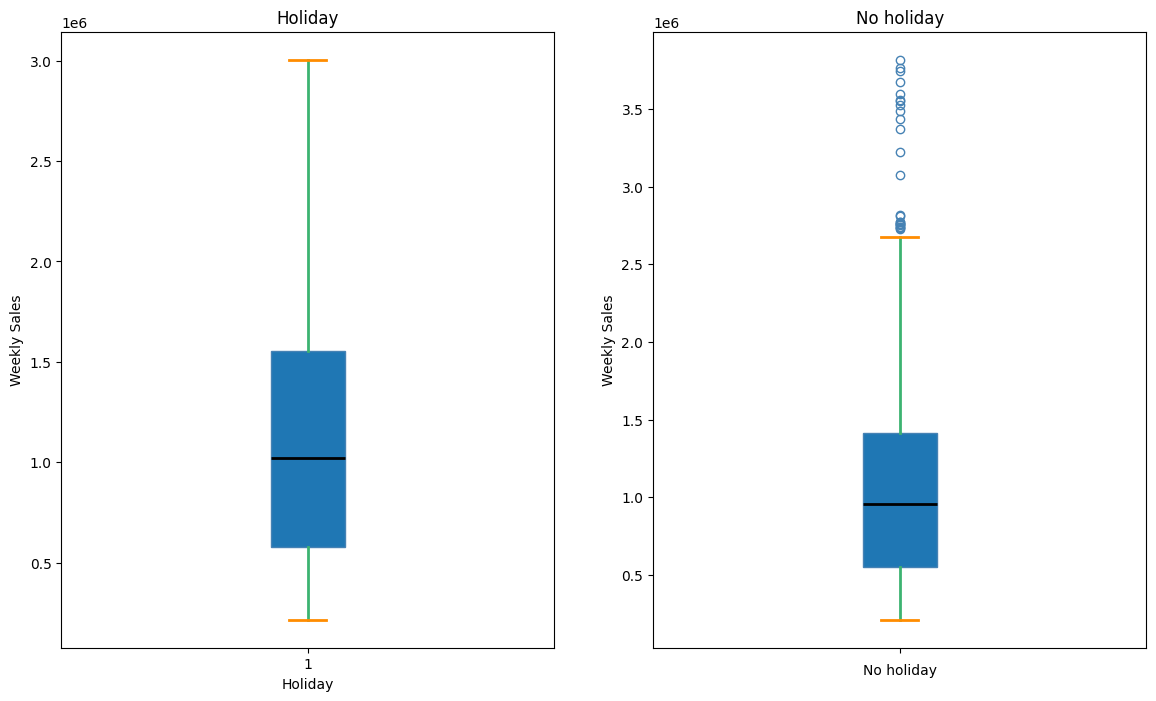

In [132]:
plt.figure(figsize = (14,8))

c1 = 'steelblue'
c2 = 'darkorange'
c3 = 'mediumseagreen'
c4 = 'black'
plt.subplot(1,2,1)
bplot = plt.boxplot(
    holiday_sales,
    patch_artist = True,
    boxprops=dict(color=c1),
    capprops=dict(color=c2,linewidth = 2),
    whiskerprops=dict(color=c3,linewidth = 2),
    flierprops=dict(color=c1, markeredgecolor=c1),
    medianprops=dict(color=c4, linewidth = 2),
)

plt.title("Holiday")

plt.xlabel("Holiday")
plt.ylabel("Weekly Sales")

plt.subplot(1,2,2)
    
bplot = plt.boxplot(
    no_holiday_sales,
    patch_artist = True,
    boxprops=dict(color=c1),
    capprops=dict(color=c2,linewidth = 2),
    whiskerprops=dict(color=c3,linewidth = 2),
    flierprops=dict(color=c1, markeredgecolor=c1),
    medianprops=dict(color=c4, linewidth = 2),
)
    

plt.title("No holiday")

plt.xlabel("No holiday")
plt.ylabel("Weekly Sales")

# Cambiar el nombre de los ticks en los ejes
plt.xticks(ticks = [1] ,labels = [''])

plt.show()

La diferencia promedio en las ventas entre vacaciones y no vacaciones es de 81577.5, es decir que las vacaciones influyen bastante en la predisposición de la gente para comprar.

No holiday encuentra que compras semanales superioes a 2.5*10^6 son raras. El percentil 50 y 75, son bastante dispares, denotando que es típico que durante las vacaciones las compras aumenten mucho, mientras que a lo largo del año son bastante estables.

# Ejercicio 4: Modelado predictivo (2 puntos)

a) Encuentra el mejor modelo de regresión lineal para predecir las ventas semanales $Weekly Sales$ en función de las variables disponibles. Prueba múltiples combinaciones de variables. (1.5 puntos)


In [173]:
X = df_walmart.drop(['Weekly_Sales', 'Date'], axis=1)
y = df_walmart['Weekly_Sales']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 123)

lm = Pipeline(steps=[
  ('scaler', StandardScaler()),
  ("lm", LinearRegression()),
])

lm = lm.fit(X_train, y_train)

In [198]:

X_2 = df_walmart[['Holiday_Flag','Store','CPI']]
y_2 = df_walmart['Weekly_Sales']

X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(X_2, y_2, test_size = 0.2, random_state = 123)

lm2 = Pipeline(steps=[
  ('scaler', StandardScaler()),
  ("lm", LinearRegression()),
])

lm2 = lm2.fit(X_train_2, y_train_2)



b) Compara los modelos evalúando el R² y el error cuadrático medio (MSE). ¿Cuál es el modelo con mejores métricas? (0.5 puntos)


In [199]:

print('Modelo 1:')
print("Variance explanation R^2 = {}".format(round(lm.score(X, y),2)))

y_pred = lm.predict(X_test)

print("Mean squared error: %.2f" % mean_squared_error(y_test, y_pred))

print('Modelo 2:')
print("Variance explanation R^2 = {}".format(round(lm2.score(X_2, y_2),2)))

y_pred_2 = lm2.predict(X_test_2)

print("Mean squared error: %.2f" % mean_squared_error(y_test_2, y_pred_2))

Modelo 1:
Variance explanation R^2 = 0.14
Mean squared error: 266826659971.09
Modelo 2:
Variance explanation R^2 = 0.14
Mean squared error: 269296215492.33


Ambos modelos tienen un rendimiento muy similar, si bien ninguno es realmente bueno debido a sus bajos valores de R^2. Es cierto que el MSE del segundo es ligeramente mayor, probablemente por estar contemplando menor cantidad de variables que el primero. 

# Ejercicio 5: Conclusiones y Recomendaciones (1 punto)

a) Redacta un informe de máximo 500 palabras resumiendo los principales hallazgos del análisis de datos y la modelización. Incluye tus conclusiones sobre qué factores influyen más en las ventas y recomendaciones para la empresa basadas en el análisis.

El análisis de datos inicial desvela que la cantidad de ventas está fuertemente correlada con las tiendas y si se está de vacaciones o no. Es decir, hay tiendas que tienen un número de ventas muy superior a otras. Además, se ha demostrado que durante las vacaciones la cantidad de ventas se dispara, mientras que el resto del año no es tan frecuente encontrar valores tan altos. No se ha conseguido encontrar ninguna correlación entre las ventas semanales, la tasa de desempleo y el precio de la gasolina. Este hecho se evidencia en el desarrollo de modelos de regresión lineal. Tanto el modelo que emplea todas las variables como el que únicamente utiliza el identificador de tienda, el CPI y si se está de vaccaciones o no, por lo tanto las otras variables son superfluas y realmente no presentan un gran impacto en el comportamiento de los compradores. Hay que tener en cuenta de hacer una gran campaña en enero, que es cuando se disparan las ventas. 